###KNN Clasifier Didabetes

Membaca data

In [ ]:
import pandas as pd
dataset=pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Lable
0,6,148,72,35,0,33.6,0.627,50,1,POSITIF
1,1,85,66,29,0,26.6,0.351,31,0,NEGATIF
2,8,183,64,0,0,23.3,0.672,32,1,POSITIF
3,1,89,66,23,94,28.1,0.167,21,0,NEGATIF
4,0,137,40,35,168,43.1,2.288,33,1,POSITIF
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NEGATIF
764,2,122,70,27,0,36.8,0.340,27,0,NEGATIF
765,5,121,72,23,112,26.2,0.245,30,0,NEGATIF
766,1,126,60,0,0,30.1,0.349,47,1,POSITIF


Mengecek data apakah ada yang missing value

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Lable                       False
dtype: bool

Menghapus data pada atribut BMI dan DiabetesPedigreeFunction





In [ ]:
dataset = dataset.drop('Pregnancies', axis='columns') #Menghapus kolom pada Pregnancies drop dikarenakan banyak pasien yang laki-laki
dataset = dataset.drop('DiabetesPedigreeFunction', axis='columns') #menghapus kolom pada DiabetesPedigreeFunction dengan drop



In [ ]:
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Lable
0,148,72,35,0,33.6,50,1,POSITIF
1,85,66,29,0,26.6,31,0,NEGATIF
2,183,64,0,0,23.3,32,1,POSITIF
3,89,66,23,94,28.1,21,0,NEGATIF
4,137,40,35,168,43.1,33,1,POSITIF
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,63,0,NEGATIF
764,122,70,27,0,36.8,27,0,NEGATIF
765,121,72,23,112,26.2,30,0,NEGATIF
766,126,60,0,0,30.1,47,1,POSITIF


In [ ]:
dataset.any()


Glucose          True
BloodPressure    True
SkinThickness    True
Insulin          True
BMI              True
Age              True
Outcome          True
Lable            True
dtype: bool

Implementasi menggunakan algoritma K-NN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


x = dataset[['BMI','Glucose','BloodPressure','SkinThickness','Insulin','Age']]# 6 atribut yang digunakan untuk perbandingan
y = dataset['Outcome']#sebagai target

# melakukan split dataset training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# membuat KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how ofter is the classifier correct?
print("Accuracy:" , knn.score(X_test, y_test))

Accuracy: 0.7662337662337663


In [ ]:
print(X_train)

      BMI  Glucose  BloodPressure  SkinThickness  Insulin  Age
603  35.2      150             78             29      126   54
118  28.2       97             60             23        0   22
247  52.3      165             90             33      680   23
157  25.2      109             56             21      135   23
468  30.0      120              0              0        0   38
..    ...      ...            ...            ...      ...  ...
763  32.9      101             76             48      180   63
192  30.4      159             66              0        0   36
629  24.7       94             65             22        0   21
559  30.1       85             74              0        0   35
684   0.0      136             82              0        0   69

[614 rows x 6 columns]


In [ ]:
print(y_train)

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64


Visualisasi Nilai K dan tingkat ke akurasiannya

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


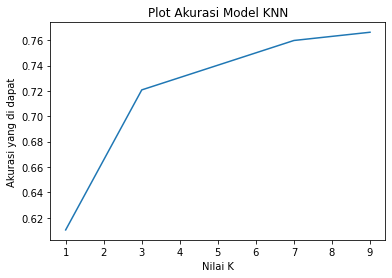

In [ ]:
# Membuat list untuk menampung nilai K dan akurasi model KNN
k_list = [1, 3, 5, 7, 9]
accuracy_list = []

# Melatih model KNN dengan variasi nilai K
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_list.append(accuracy)

# Membuat plot akurasi model KNN pada sumbu y dan nilai K pada sumbu x
plt.plot(k_list, accuracy_list)
plt.xlabel('Nilai K')
plt.ylabel('Akurasi yang di dapat')
plt.title('Plot Akurasi Model KNN')
plt.show()


Kesimpulan dari eksperimen kali ini bahwa nilai K= 9 merupakan nilai K yang terbaik,sehingga mendapatkan tingkat akurasi tertinggi yaitu 0.76 atau 76%.

###Uji coba dalam pengklasifikasi pasien 

In [ ]:
lookup_diabetes_name = dict(zip(dataset.Outcome.unique(), dataset.Lable.unique()))   
print(lookup_diabetes_name)

{1: 'POSITIF', 0: 'NEGATIF'}


In [ ]:
print("Prediksi Diabetes")
input("Masukan Nama Anda:")
BMI=int(input("masukan BMI:"))
Glucose=int(input("masukan Glucose:"))
BloodPressure=int(input("masukan BloodPressure:"))
SkinThickness=int(input("masukan SkinThickness(4.90-21.00 normal):"))
Insulin=int(input("masukan Insulin:"))
Age=int(input("masukan Age:"))

In [ ]:
deases_prediction = knn.predict([[BMI,Glucose, BloodPressure,SkinThickness,Insulin,Age]])
print("Hasil diagnosa Pasien:",lookup_diabetes_name[deases_prediction[0]])



import warnings
warnings.filterwarnings('ignore', message="X does not have valid feature names, but KNeighborsClassifier was fitted with feature names", category=UserWarning)


#Kesimpulan akhir

Pada program ini dapat membantu dokter dalam mengklasifikasikan pasien dalam mendiagnosa penyakit diabetes. Dimana dokter harus memasukan hasil dari pemeriksaan pasien seperti,

1.Body Mesh Index(BMI)

2.kandungan Glukosa(Glucose)

3.tekanan darah(BloodPressure)

4.ketebalan kulit(SkinThickness)

5.hormon pengatur gula darah(Insulin)

6.Umur(age)